<a href="https://colab.research.google.com/github/MadhavanTR/Kalman-Estimation/blob/master/Trial3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from scipy import signal
np.random.seed(1992)
NumSteps = 201
TimeScale = np.linspace(0,10,NumSteps)
DeltaSim = np.diff(TimeScale)[0]
SigmaInput = 1
SigmaNoise = 0.5
F = np.array([[1,0,DeltaSim,0],[0,1,0,DeltaSim],[0,0,1,0],[0,0,0,1]])
Q = SigmaInput**2 * np.array([[DeltaSim**3/3,0,DeltaSim**2/2,0],
[0,DeltaSim**3/3,0,DeltaSim**2/2],
[DeltaSim**2/2,0,DeltaSim,0],
[0,DeltaSim**2/2,0,DeltaSim]])
H = np.array([[1,0,0,0],[0,1,0,0]])
R = SigmaNoise**2 * np.identity(2)
State = np.zeros((4,NumSteps))
NoisyMeasurements = np.zeros((2,NumSteps))
for t in np.arange(1,NumSteps):
  ProcessNoise = np.squeeze(np.matmul(np.linalg.cholesky(Q),np.random.randn(4,1)))
  State[:,t] = np.matmul(F,State[:,t-1]) + ProcessNoise
  MeasurementNoise = SigmaNoise * np.squeeze(np.random.randn(2))
  NoisyMeasurements[:,t] = np.matmul(H,State[:,t]) + MeasurementNoise
StateX1 = State[0,:]
StateX2 = State[1,:]
DownSampling=2
NoisyMeasurements = NoisyMeasurements[:,::DownSampling]
MeasurementY1 = NoisyMeasurements[0,:]
MeasurementY2 = NoisyMeasurements[1,:]

Text(0, 0.5, 'x_2 coordinate')

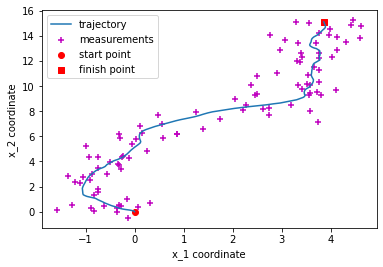

In [7]:
import matplotlib.pyplot as plt
# plt.plot(TimeScale, StateX1)
# # np.shape(TimeScale)
# plt.plot(TimeScale, StateX2)
plt.plot(StateX1, StateX2, label='trajectory')
# np.shape(NoisyMeasurements)
plt.scatter(NoisyMeasurements[0, :], NoisyMeasurements[1, :], marker='+', color='m', label='measurements')
plt.scatter(StateX1[0], StateX2[0], color='r', marker='o', label='start point')
plt.scatter(StateX1[-1], StateX2[-1], color='r', marker='s', label='finish point')
plt.legend(loc='best', fancybox=True)
plt.xlabel(xlabel = "x_1 coordinate")
plt.ylabel(ylabel = "x_2 coordinate")

In [0]:
from numpy.linalg import inv
NumSteps = 101
TimeScale = np.linspace(0,10,NumSteps)
DeltaSim = np.diff(TimeScale)[0]
SigmaNoise = 0.5
Q = SigmaInput**2 * np.array([[DeltaSim**3/3,0,DeltaSim**2/2,0],
[0,DeltaSim**3/3,0,DeltaSim**2/2],
[DeltaSim**2/2,0,DeltaSim,0],
[0,DeltaSim**2/2,0,DeltaSim]])
R = SigmaNoise**2 * np.identity(2)

xp=np.zeros((4, 1))
Pp=np.identity(4)
xu_array=np.array([])
xp_array=np.array([])

# First Update
i=0
K=np.dot(np.dot(Pp, H.T), inv(np.dot(np.dot(H, Pp), H.T) + R))
Pp=Pp - np.dot(K, np.dot(H, Pp))
xp=xp + np.dot(K, (np.reshape(NoisyMeasurements[:, 0], (2, 1)) - np.dot(H, xp)))
xu_array=np.append(xu_array, xp)

i=i+1
for i in range(1, 101):
  # Prediction
  Pp=np.dot(F, np.dot(Pp, F.T)) + Q
  xp=np.dot(F, xp)
  xp_array=np.append(xp_array, xp)
  # Update
  K=np.dot(np.dot(Pp, H.T), inv(np.dot(np.dot(H, Pp), H.T) + R))
  Pp=Pp - np.dot(K, np.dot(H, Pp))
  xp=xp + np.dot(K, (np.reshape(NoisyMeasurements[:, i], (2, 1)) - np.dot(H, xp)))
  xu_array=np.append(xu_array, xp)
xp_array=xp_array.reshape(-1, 4).T
xu_array=xu_array.reshape(-1, 4).T
StateX1p = xp_array[0,:]
StateX2p = xp_array[1,:]
StateX1u = xu_array[0,:]
StateX2u = xu_array[1,:]

Text(0, 0.5, 'x_2 coordinate')

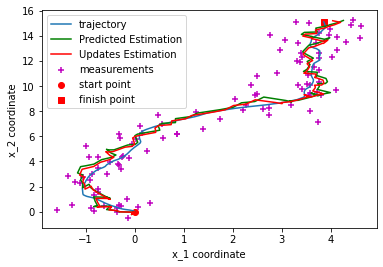

In [46]:
import matplotlib.pyplot as plt
# plt.plot(TimeScale, StateX1)
# # np.shape(TimeScale)
# plt.plot(TimeScale, StateX2)
plt.plot(StateX1, StateX2, label='trajectory')
plt.plot(StateX1p, StateX2p, label='Predicted Estimation', color='g')
plt.plot(StateX1u, StateX2u, label='Updated Estimation', color='r')
# np.shape(NoisyMeasurements)
plt.scatter(NoisyMeasurements[0, :], NoisyMeasurements[1, :], marker='+', color='m', label='measurements')
plt.scatter(StateX1[0], StateX2[0], color='r', marker='o', label='start point')
plt.scatter(StateX1[-1], StateX2[-1], color='r', marker='s', label='finish point')
plt.legend(loc='best', fancybox=True)
plt.xlabel(xlabel = "x_1 coordinate")
plt.ylabel(ylabel = "x_2 coordinate")

In [43]:
np.shape(np.reshape(NoisyMeasurements[:, 0], (2, 1)) - np.dot(H, xp))
for i in range(1, 5):
  print(i)
np.shape(NoisyMeasurements)
# a=np.array([])
# a=np.append(a, 1)
# a=np.append(a, 2)
# a
K=np.dot(np.dot(Pp, H.T), inv(np.dot(np.dot(H, Pp), H.T) + R))
np.shape(K)
np.shape(xp)
np.shape(xp_array)
a=xp_array.reshape(-1,4)
np.shape(a[:, 1])
#a[0,:]
xp_array[0]
np.shape(State)
xp_array

1
2
3
4


array([[ 0.00000000e+00, -6.26843123e-02, -1.78106470e-02,
        -1.12519627e-01, -3.08093040e-01, -4.11153640e-01,
        -5.70079087e-01, -5.04956063e-01, -4.98993597e-01,
        -8.31158367e-01, -7.55144706e-01, -8.03624126e-01,
        -8.33704474e-01, -5.65493328e-01, -4.96394688e-01,
        -5.86653688e-01, -7.65497209e-01, -8.83801539e-01,
        -9.28002285e-01, -1.05970422e+00, -1.06035575e+00,
        -1.10024771e+00, -1.05454439e+00, -1.16261515e+00,
        -1.10071562e+00, -9.93958066e-01, -8.28602449e-01,
        -6.73879317e-01, -5.60887763e-01, -4.72103655e-01,
        -3.79390986e-01, -4.72662401e-01, -5.71993670e-01,
        -5.42237674e-01, -4.17769867e-01, -1.38719775e-01,
         1.52792450e-02,  6.52206403e-02,  4.03101795e-02,
         6.29741556e-03,  5.96971528e-02,  3.08372985e-01,
         5.15032847e-01,  5.05877607e-01,  4.78525549e-01,
         5.62407759e-01,  8.34079201e-01,  8.34952093e-01,
         1.14277509e+00,  1.27286768e+00,  1.75035417e+0